**BRAIN TUMOR DETECTION AND CLASSIFICATION USING MRI SCANS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from glob import glob
import warnings
warnings.filterwarnings("ignore")

**Dowload the dataset from kaggle**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


**LOAD THE DATASET**

**Training Data**

In [3]:
def train_df(tr_path):
    
    classes,class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                               for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                               for image in os.listdir(os.path.join(tr_path, label))])
    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class':classes})
    return tr_df

In [4]:
tr_df=train_df(r"C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Training")

In [5]:
tr_df.shape

(5712, 2)

In [6]:
tr_df.head(10)

,Class Path,Class
0,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
1,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
2,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
3,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
4,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
5,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
6,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
7,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
8,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
9,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma


In [7]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class Path  5712 non-null   object
 1   Class       5712 non-null   object
dtypes: object(2)
memory usage: 89.4+ KB


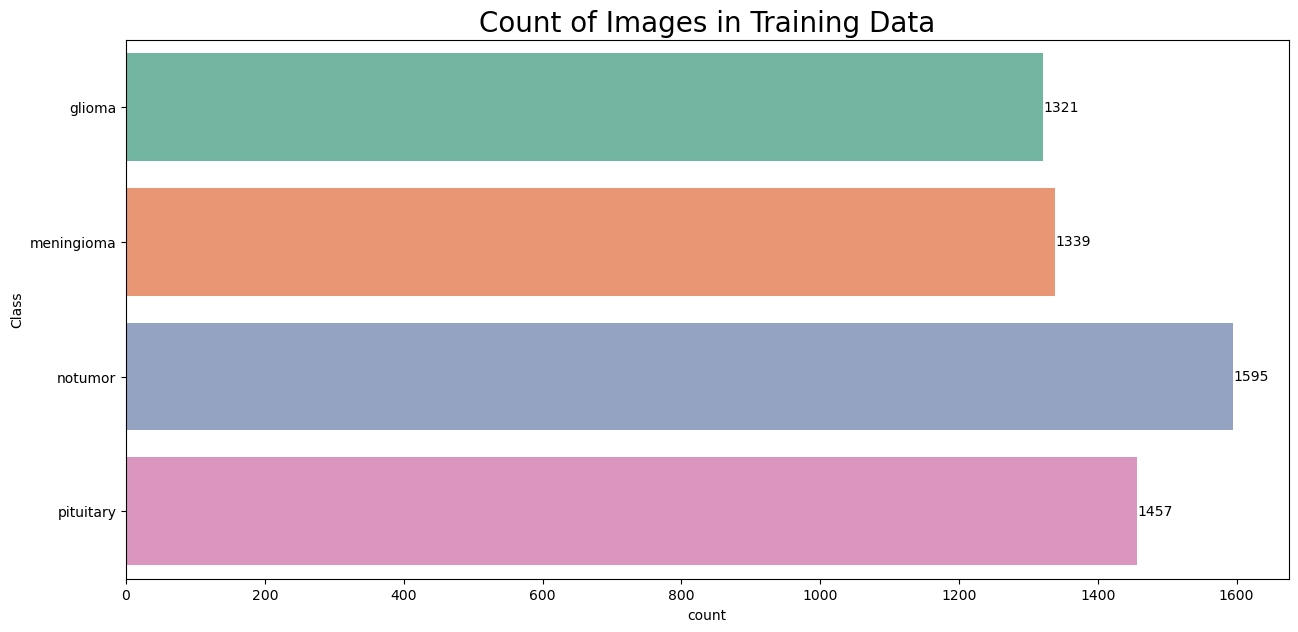

In [8]:
#count of images in each class of training data
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, y='Class', palette='Set2', hue='Class', dodge=False)
plt.title("Count of Images in Training Data", fontsize=20)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**Testing Data**

In [9]:
def tesr_df(ts_path):
    
    classes,class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                               for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                               for image in os.listdir(os.path.join(ts_path, label))])
    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class':classes})
    return ts_df

In [10]:
ts_df=train_df(r"C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing")

In [11]:
ts_df.shape

(1311, 2)

In [12]:
ts_df.head()

,Class Path,Class
0,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
1,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
2,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
3,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
4,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma


In [13]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class Path  1311 non-null   object
 1   Class       1311 non-null   object
dtypes: object(2)
memory usage: 20.6+ KB


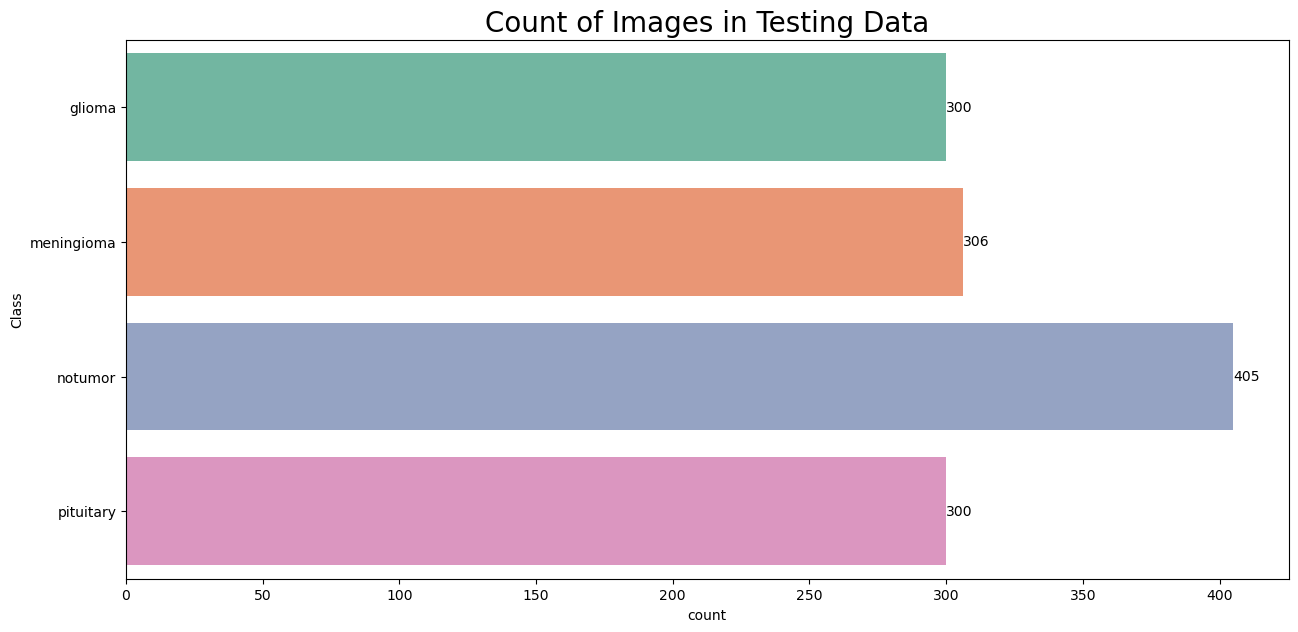

In [14]:
#count of images in each class of testing data
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, y='Class', palette='Set2', hue='Class', dodge=False)
plt.title("Count of Images in Testing Data", fontsize=20)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**SPLITITNG DATA INTO TRAINING,TESTING**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
valid_df ,ts_df = train_test_split(ts_df,
                                   train_size= 0.5,
                                   random_state = 42,
                                   stratify = ts_df['Class'])

In [17]:
valid_df

,Class Path,Class
843,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,notumor
329,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,meningioma
776,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,notumor
158,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
591,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,meningioma
...,...,...
477,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,meningioma
127,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
109,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,glioma
764,C:\Users\HP\.cache\kagglehub\datasets\masoudni...,notumor


**Data Preprocessing**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
#parametes
batch_size = 32
img_size= (299, 299)

#Data generators for training and validation
_gen = ImageDataGenerator(rescale = 1/255, brightness_range=(0.8,1.2))
ts_gen = ImageDataGenerator(rescale = 1/255)

#training generator
tr_gen = _gen.flow_from_dataframe(tr_df,
                                  x_col = 'Class Path',
                                  y_col= 'Class',
                                  batch_size = batch_size,
                                  target_size = img_size)

#validation generator
valid_gen = _gen.flow_from_dataframe(valid_df,
                                x_col = 'Class Path',
                                y_col= 'Class', 
                                batch_size = batch_size,
                                target_size = img_size)

#test generator
ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col = 'Class Path',
                                    y_col = 'Class',
                                    batch_size = 16,
                                    target_size = img_size,
                                    shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


**DATA INSIDE THE DATASET**

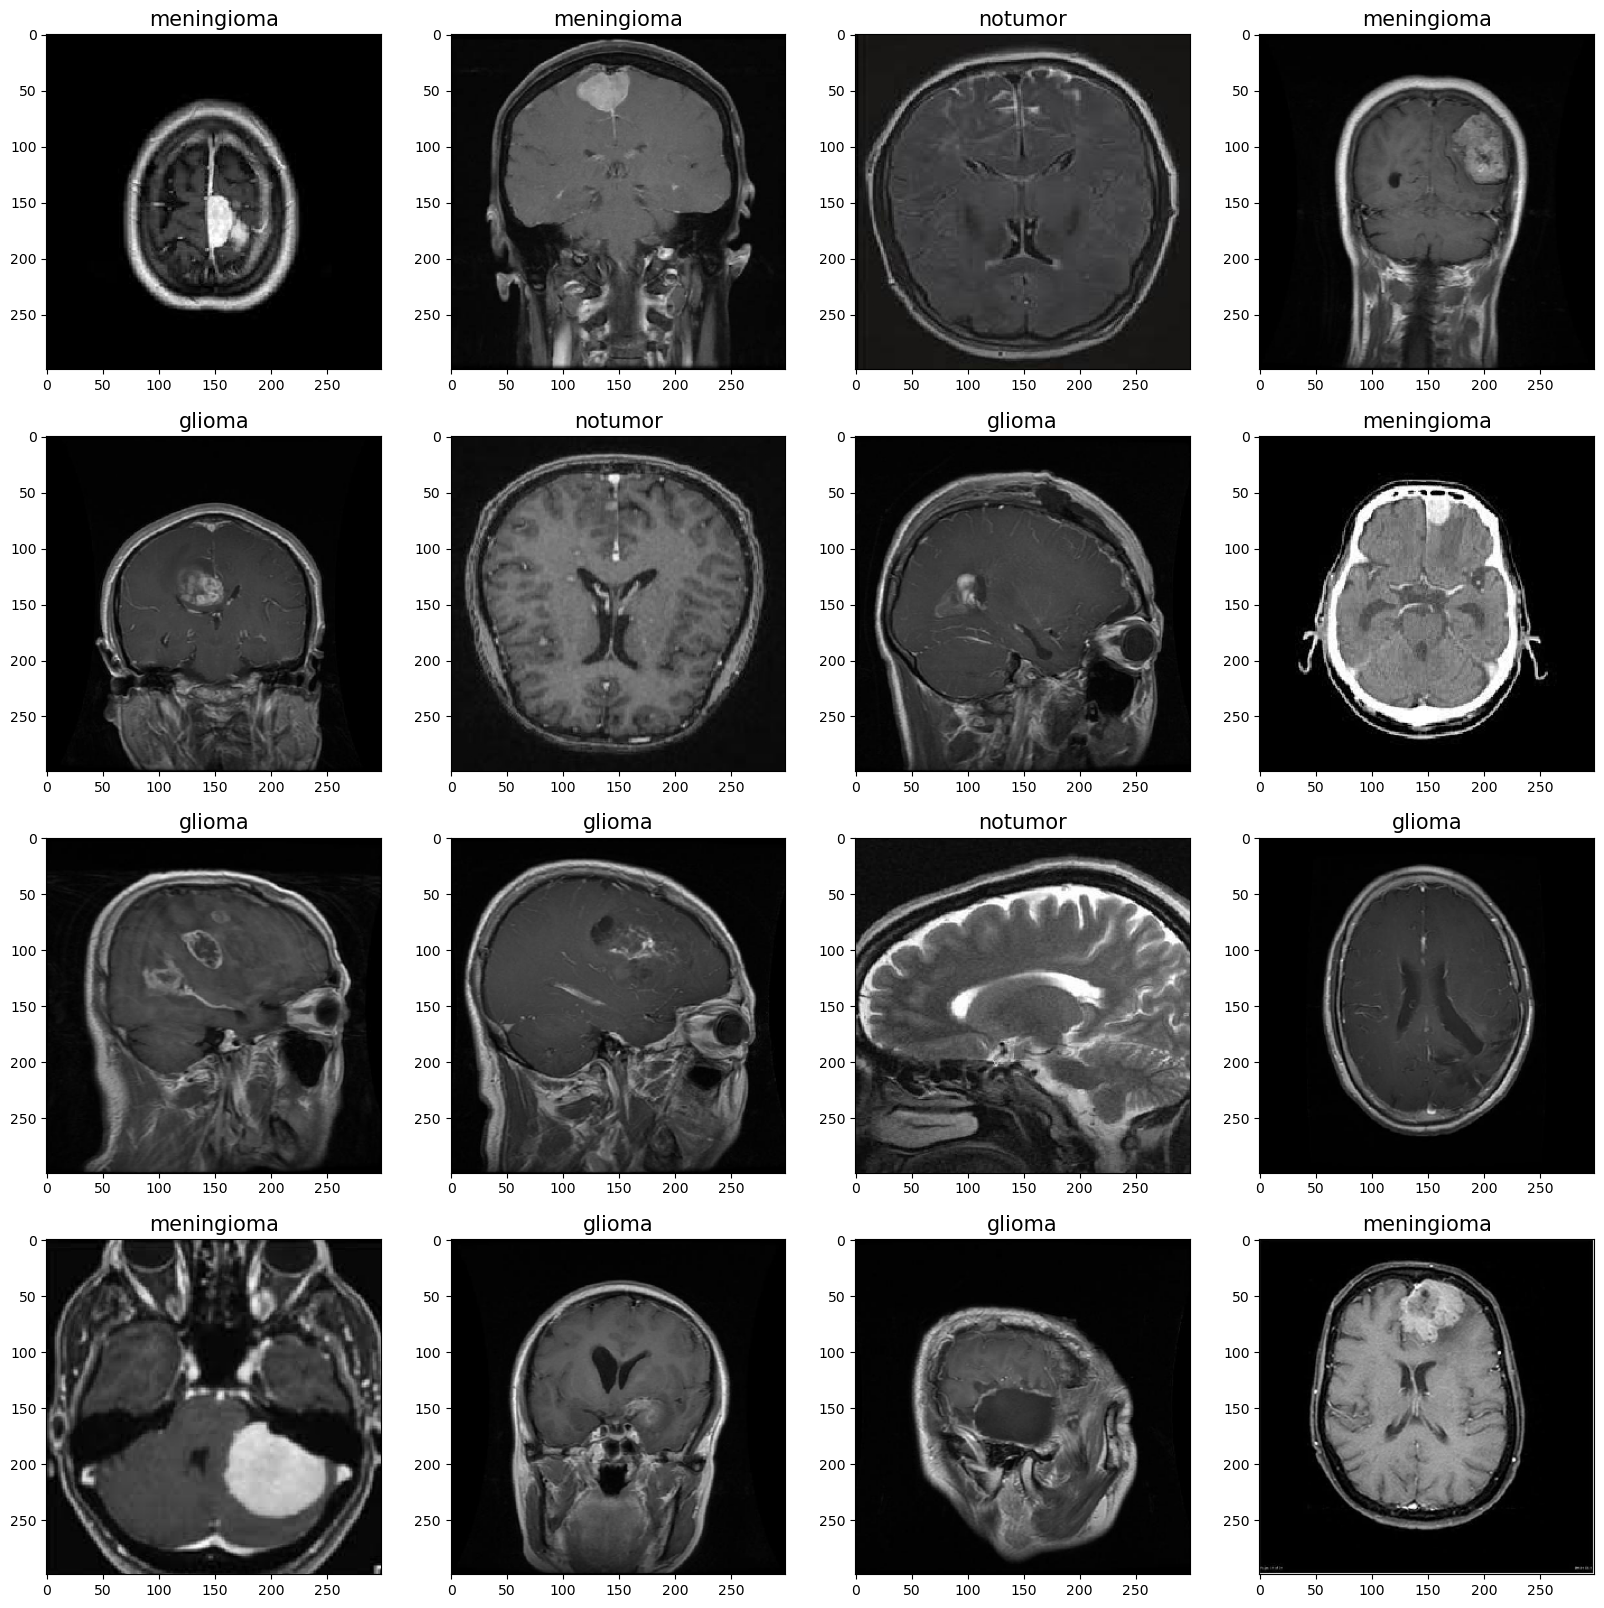

In [20]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

**Building Deep Learning Model**

In [21]:
#libraries required
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten,Dropout,Dense,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision,Recall

In [22]:
#img input shape
img_shape = (299,299,3)


base_model = tf.keras.applications.Xception(include_top =False,
                                            weights= "imagenet",
                                            input_shape=img_shape,
                                            pooling = "max")

# Freeze the base model to prevent training
base_model.trainable = False

#define input layer
inputs = Input(shape = img_shape)

#pass the input layer throug the base model
x= base_model(inputs)

#flatten the output of the base model
x = Flatten()(x)

#add a dropout layer for regularization
x = Dropout(rate = 0.3)(x)

#add a fully connected(Dense) layer
x = Dense(128, activation = 'relu')(x)

#add a dropout layer for regularization
x = Dropout(rate = 0.25)(x)

#add the final output layer with softmax activation for multi-class classification
x= Dense(4, activation ="softmax")(x)

#create the model with the input and output
model = Model(inputs, x)

#compile the model
model.compile(Adamax(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics = ["accuracy",Precision(),Recall()])

In [23]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

**TRAING THE MODEL**

In [24]:
hist = model.fit(tr_gen, # traiing the data generator
                 epochs = 10, #number of times it tereate over the training data
                 validation_data = valid_gen, # the validation data generator
                 shuffle = False) # whether to shuffle the training data

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 690s 4s/step - accuracy: 0.6007 - loss: 1.2875 - precision: 0.6479 - recall: 0.5337 - val_accuracy: 0.7847 - val_loss: 0.4911 - val_precision: 0.8618 - val_recall: 0.7328
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 686s 4s/step - accuracy: 0.7961 - loss: 0.5081 - precision: 0.8317 - recall: 0.7576 - val_accuracy: 0.8305 - val_loss: 0.4141 - val_precision: 0.8769 - val_recall: 0.7832
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.8422 - loss: 0.4199 - precision: 0.8666 - recall: 0.8135 - val_accuracy: 0.8489 - val_loss: 0.3859 - val_precision: 0.8828 - val_recall: 0.8168
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 689s 4s/step - accuracy: 0.8561 - loss: 0.3794 - precision: 0.8783 - recall: 0.8329 - val_accuracy: 0.8626 - val_loss: 0.3414 - val_precision: 0.8816 - val_recall: 0.8412
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 687s 4s/step - accuracy: 0.8908 - loss: 0.3117 - precision: 0.9038 - recall: 0.8705 - val_accuracy: 0.8702 - val_los

In [25]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

In [26]:
tr_gen.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [27]:
model.save("F:/PROJECT/FINAL PROJECT 3/brain_tumor.keras")

**VISUVALIZING THE MODEL PERFORMANCE**

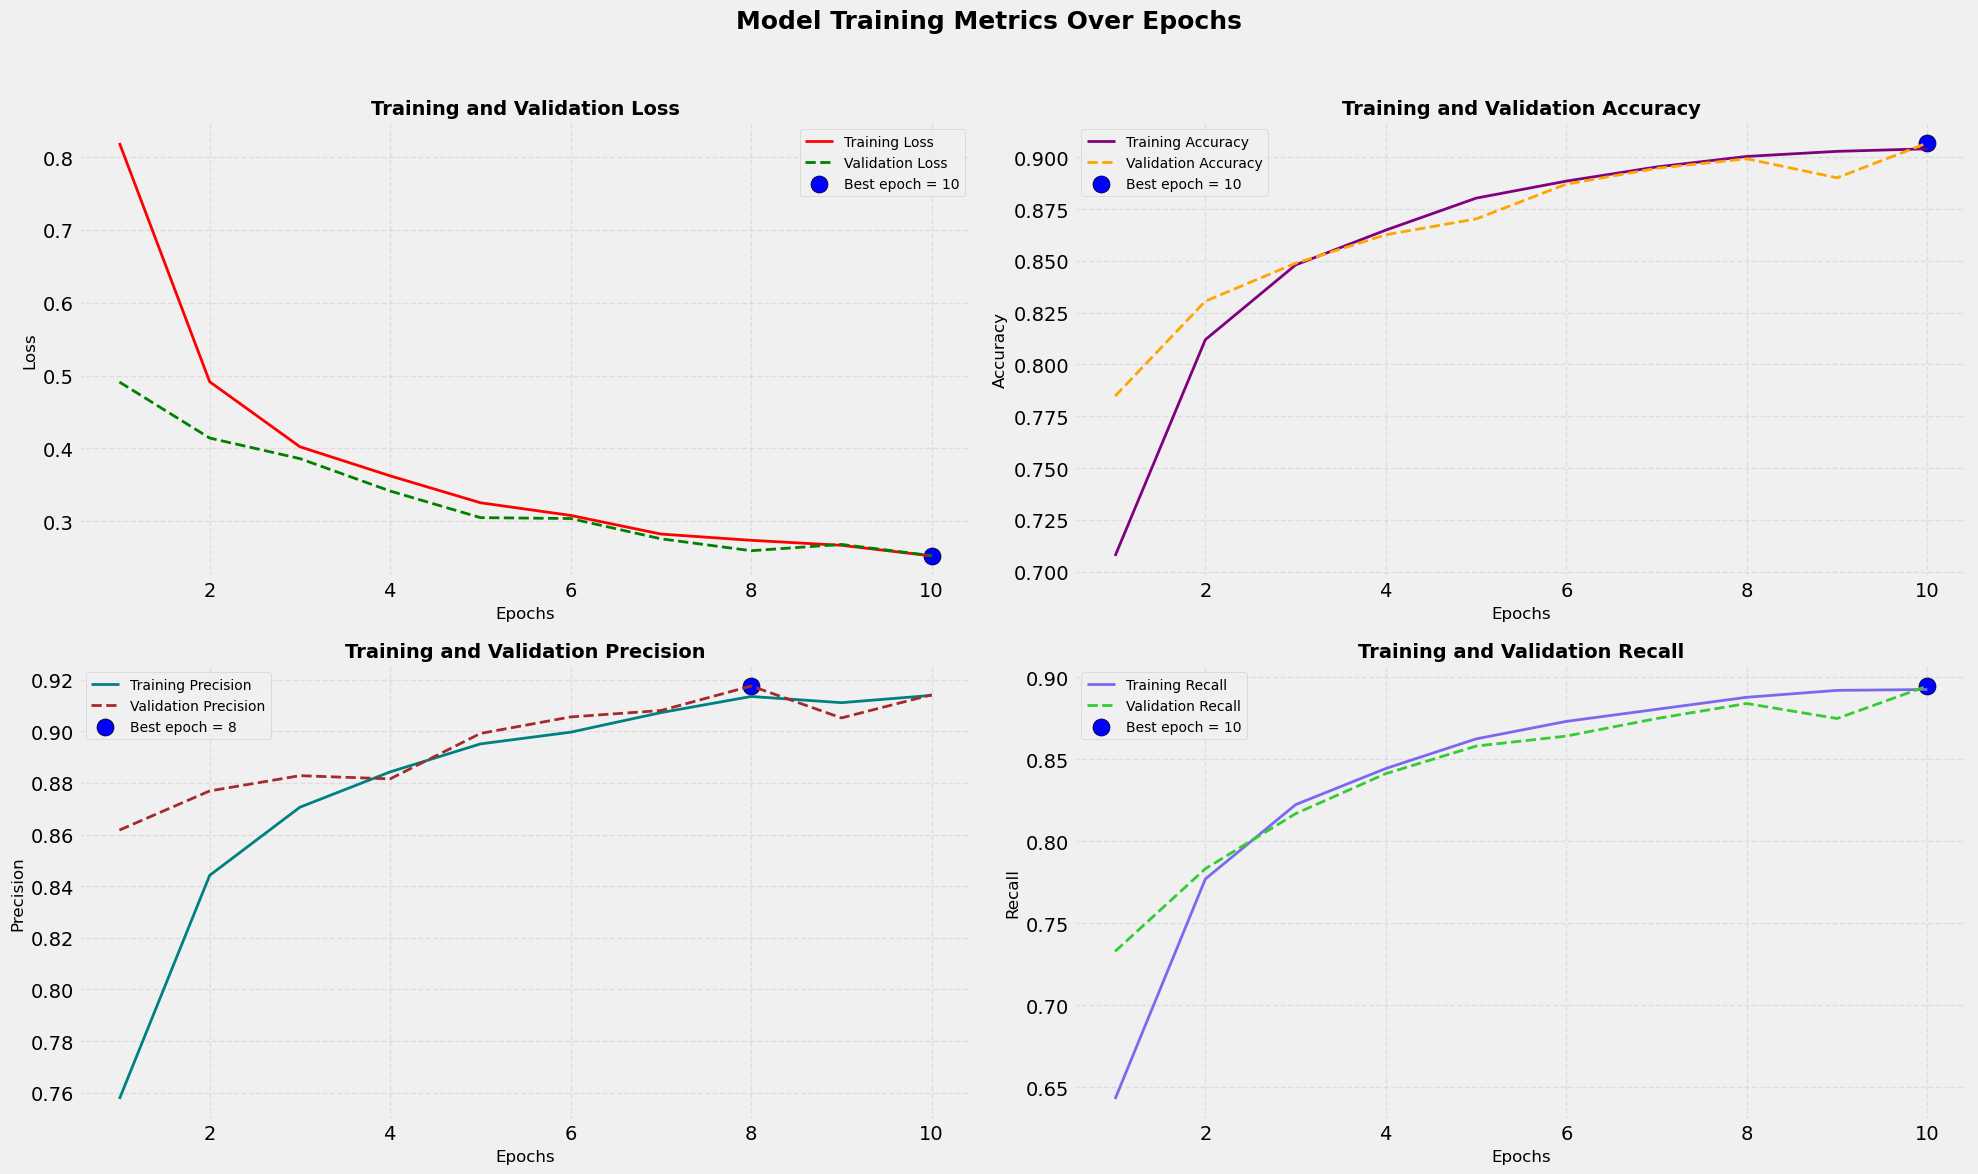

In [28]:
# Access the training and validation metrics from the history object
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_precision = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_precision = hist.history['val_precision']
val_recall = hist.history['val_recall']

# Find the best epochs based on the validation metrics
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_precision)
precision_highest = val_precision[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

# Define the epochs and labels for plotting
Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
precision_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'

plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,12))

# Plot training and validation loss
plt.subplot(2,2,1)
plt.plot(Epochs, tr_loss, color = 'red', label = 'Training Loss', linewidth = 2)
plt.plot(Epochs, val_loss, color = 'green', label = 'Validation Loss', linestyle = '--', linewidth = 2)
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label = loss_label, edgecolors = 'black')
plt.title('Training and Validation Loss', fontsize = 14, fontweight = 'bold')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend(fontsize = 10)
plt.grid(visible = True, linestyle = '--', alpha = 0.5)

# Plot training and validation Accuracy
plt.subplot(2,2,2)
plt.plot(Epochs, tr_acc, color = 'purple', label = 'Training Accuracy', linewidth = 2)
plt.plot(Epochs, val_acc, color = 'orange', label = 'Validation Accuracy', linestyle = '--', linewidth = 2)
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label = acc_label, edgecolors = 'black')
plt.title('Training and Validation Accuracy', fontsize = 14, fontweight = 'bold')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend(fontsize = 10)
plt.grid(visible = True, linestyle = '--', alpha = 0.5)

# Plot training and validation Precision
plt.subplot(2,2,3)
plt.plot(Epochs, tr_precision, color = 'teal', label = 'Training Precision', linewidth = 2)
plt.plot(Epochs, val_precision, color = 'brown', label = 'Validation Precision', linestyle = '--', linewidth = 2)
plt.scatter(index_precision + 1, precision_highest, s=150, c='blue', label = precision_label, edgecolors = 'black')
plt.title('Training and Validation Precision', fontsize = 14, fontweight = 'bold')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Precision', fontsize = 12)
plt.legend(fontsize = 10)
plt.grid(visible = True, linestyle = '--', alpha = 0.5)

# Plot training and validation Recall
plt.subplot(2,2,4)
plt.plot(Epochs, tr_recall, color = '#7B68EE', label = 'Training Recall', linewidth = 2)
plt.plot(Epochs, val_recall, color = '#32CD32', label = 'Validation Recall', linestyle = '--', linewidth = 2)
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label = recall_label, edgecolors = 'black')
plt.title('Training and Validation Recall', fontsize = 14, fontweight = 'bold')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Recall', fontsize = 12)
plt.legend(fontsize = 10)
plt.grid(visible = True, linestyle = '--', alpha = 0.5)

# Add a title for the entire figure
plt.suptitle('Model Training Metrics Over Epochs', fontsize = 18, fontweight = 'bold')
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

**TESTING AND EVALUATION**

*Evaluating the Code*

In [29]:
train_score = model.evaluate(tr_gen,verbose = 1)
valid_score = model.evaluate(valid_gen,verbose = 1)
test_score = model.evaluate(ts_gen,verbose = 1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}")
print('-'*20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}")
print('-'*20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - accuracy: 0.9457 - loss: 0.1585 - precision: 0.9498 - recall: 0.9421
21/21 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.9223 - loss: 0.2398 - precision: 0.9291 - recall: 0.9015
41/41 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9343 - loss: 0.2067 - precision: 0.9456 - recall: 0.9259
Train Loss: 0.1587
Train Accuracy: 94.50
--------------------
Validation Loss: 0.2496
Validation Accuracy: 91.15
--------------------
Test Loss: 0.2256
Test Accuracy: 91.77


In [30]:
preds=model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step


In [31]:
class_dict = tr_gen.class_indices

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

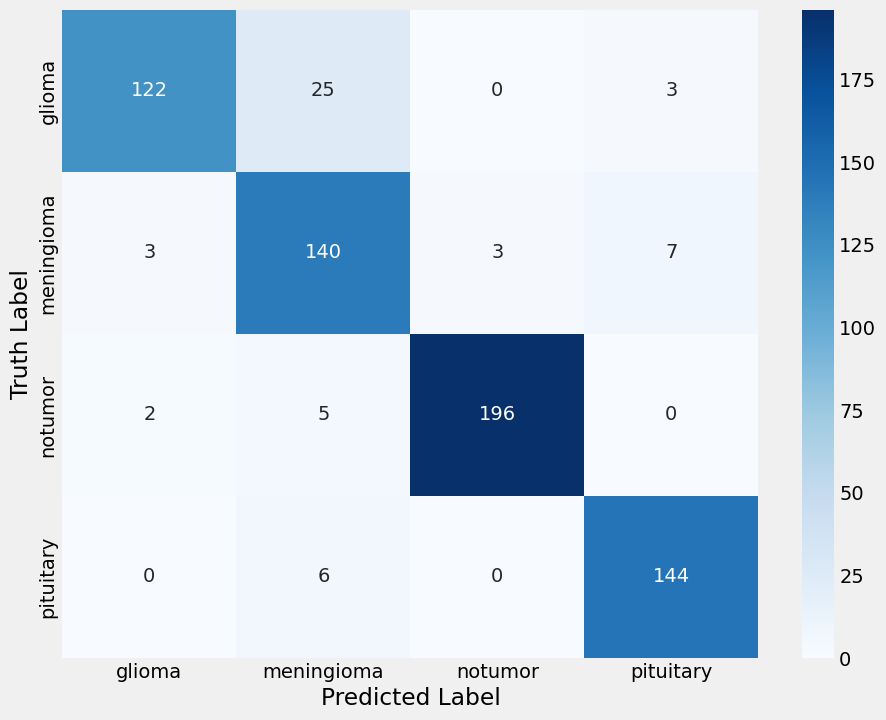

In [33]:
#confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues',xticklabels=labels,yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [34]:
#classification report
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       150
           1       0.80      0.92      0.85       153
           2       0.98      0.97      0.98       203
           3       0.94      0.96      0.95       150

    accuracy                           0.92       656
   macro avg       0.92      0.91      0.91       656
weighted avg       0.92      0.92      0.92       656



*Testing the data*

In [35]:
from PIL import Image

In [69]:
def predict(img_path):
    # Retrieve class labels
    label = list(class_dict.keys())
    
    # Preprocess image
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))  # Adjust size based on your model's input
    img_array = np.asarray(resized_img)
    
    # Ensure the image has 3 channels (RGB)
    if img_array.ndim == 2:  # If grayscale
        img_array = np.stack((img_array,) * 3, axis=-1)
    elif img_array.shape[-1] == 4:  # If RGBA
        img_array = img_array[..., :3]
    
    # Normalize and add batch dimension
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Debug shape
    print("Processed image shape:", img_array.shape)
    print("Model input shape:", model.input_shape)
    
    # Get predictions
    predictions = model.predict(img_array)
    probs = list(predictions[0])
    labels = label
    
    # Plot image and probabilities
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.axis('off')  # Hide axes for the image display
    
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs, color="skyblue")
    plt.xlabel('Probability')
    plt.ylabel('Class Labels')
    plt.title('Prediction Probabilities')
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()

Processed image shape: (1, 299, 299, 3)
Model input shape: (None, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


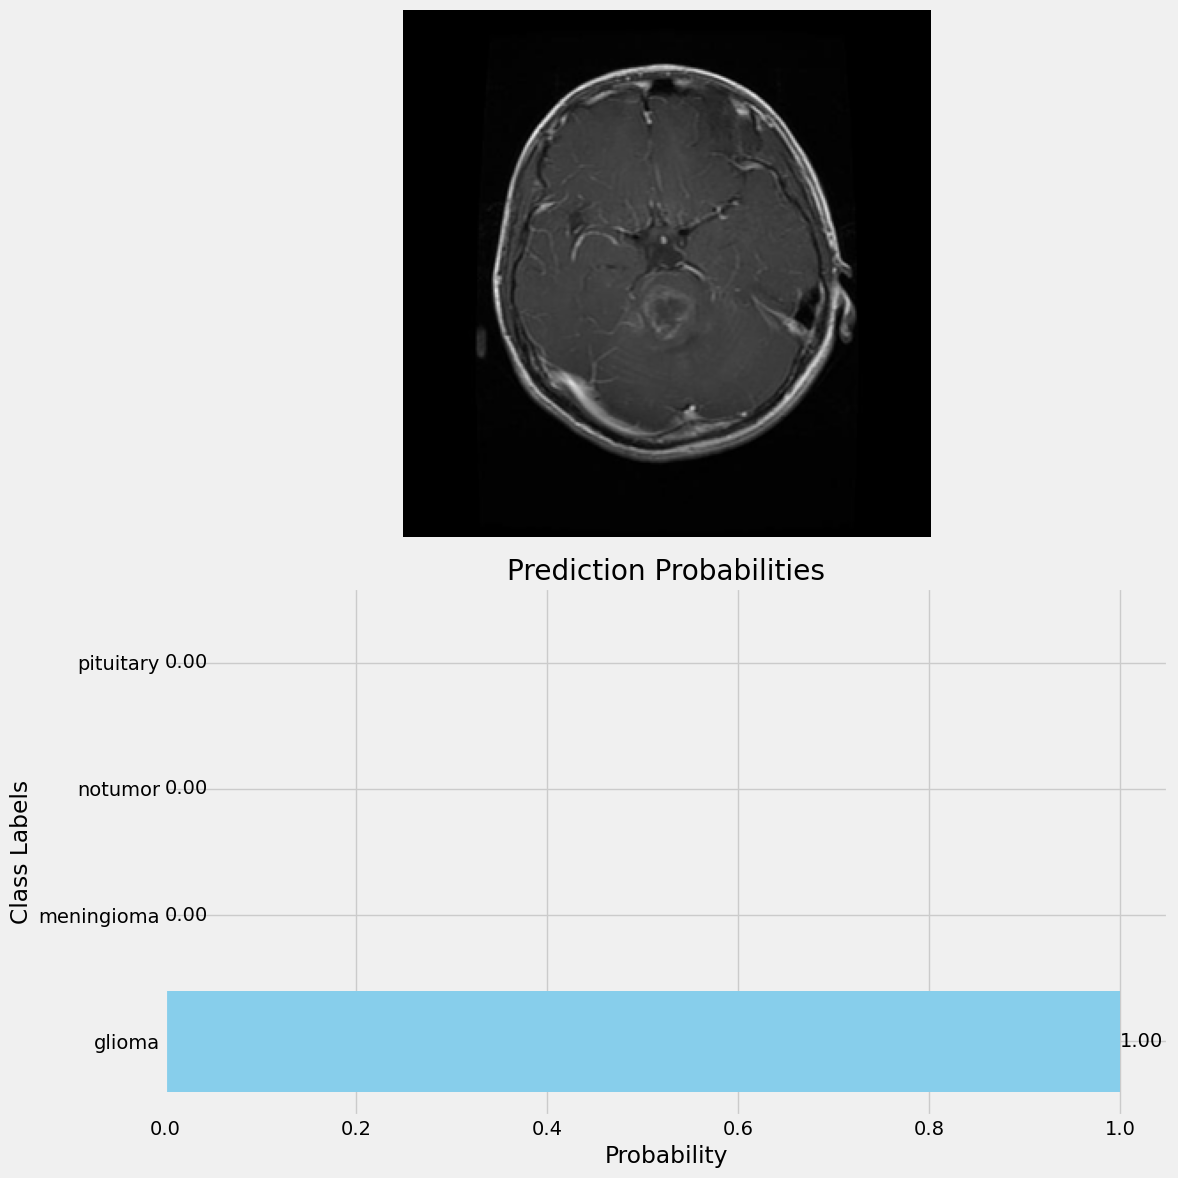

In [70]:
predict(r"C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing\glioma\Te-glTr_0007.jpg")

Processed image shape: (1, 299, 299, 3)
Model input shape: (None, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


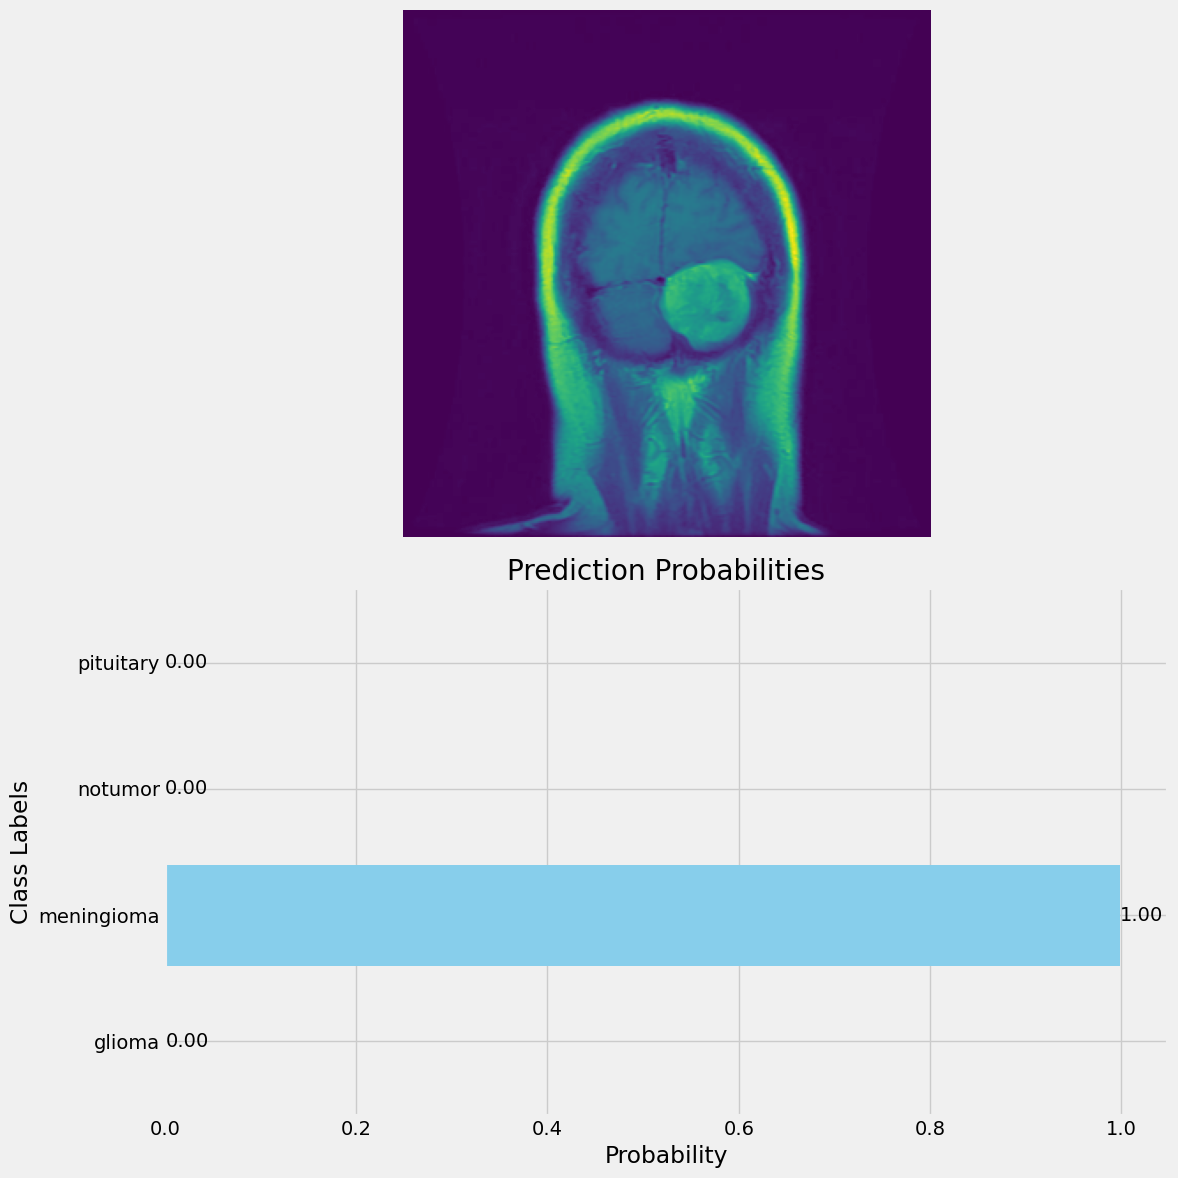

In [79]:
predict(r"C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing\meningioma\Te-me_0210.jpg")

Processed image shape: (1, 299, 299, 3)
Model input shape: (None, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


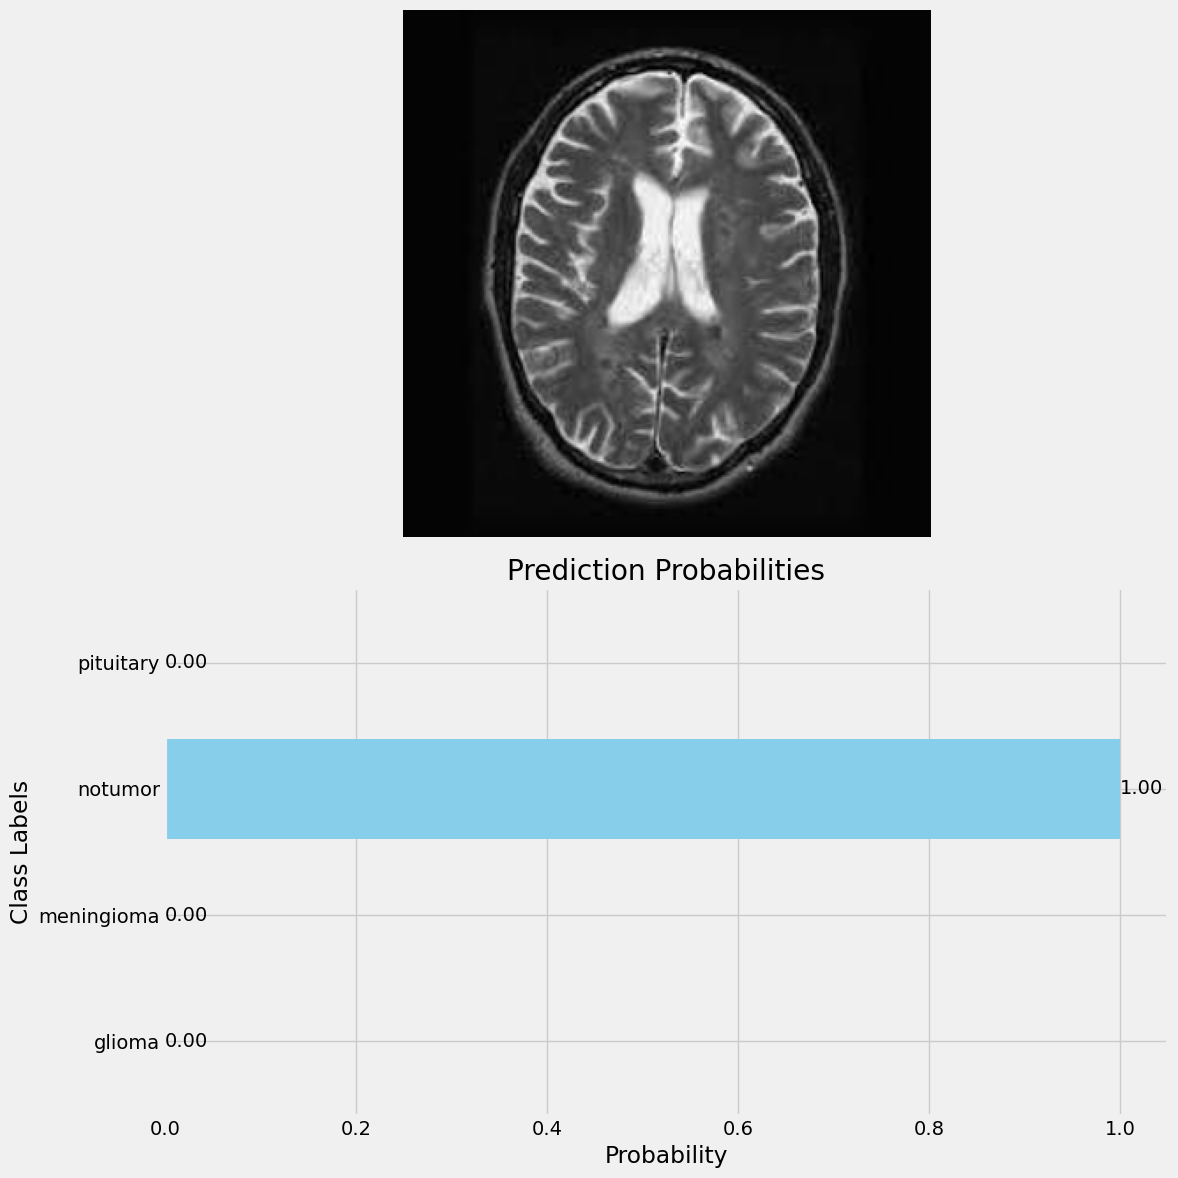

In [67]:
predict(r"C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing\notumor\Te-no_0383.jpg")

Processed image shape: (1, 299, 299, 3)
Model input shape: (None, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


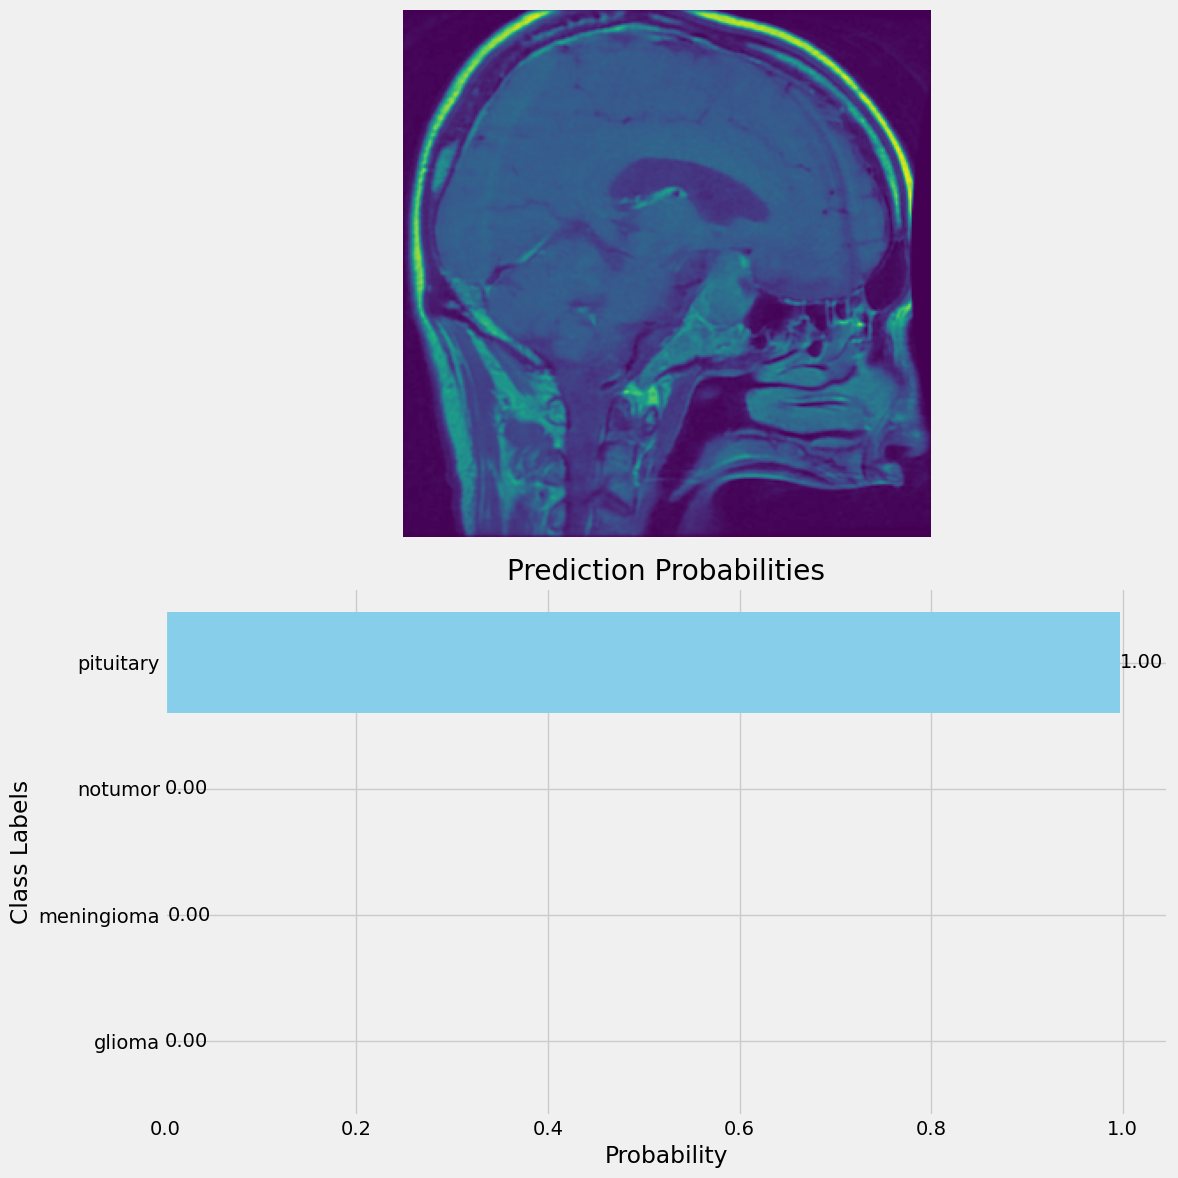

In [81]:
predict(r"C:\Users\HP\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing\pituitary\Te-pi_0256.jpg")

**GRADIO INTERFACE FOR CLASSIFYING BRAIN TUMORS**

Gradio provides a simple way to create a web interface for machine learning models, whether you're working with images, text, or other data types. This can be especially helpful for demonstrations, model deployment, or user testing.It enables users to interact with the model easily by uploading input and viewing outputs directly.

In [41]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the model
model = load_model("F:/PROJECT/FINAL PROJECT 3/brain_tumor.keras")  # Replace with your model loading logic

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

def classify_tumor(input_image):
    img = Image.fromarray(input_image)
    resized_img = img.resize((299, 299))  # Resizing
    img = np.asarray(resized_img)
    if img.ndim == 2:  # Handle grayscale
        img = np.stack((img,) * 3, axis=-1)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalizing
    prediction = model.predict(img)
    confidences = {class_names[i]: float(prediction[0][i]) for i in range(len(class_names))}
    return {class_name: conf for class_name, conf in sorted(confidences.items(), key=lambda x: x[1], reverse=True)}

iface = gr.Interface(
    fn=classify_tumor,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Label(num_top_classes=len(class_names)),
    title="Brain Tumor Classification",
    description="Upload an image of a Brain to classify its tumor.",
    theme=gr.themes.Soft()
)

# Launch the interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
